In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
# Convert csv file into dataframes
df_bixi = pd.read_csv("../data/bixi_bike_stations.csv")
df_fs = pd.read_csv("../data/foursquare_df.csv")
df_yelp = pd.read_csv("../data/yelp_df.csv")

In [20]:
# Join bixi with foursquare dataframe
df_merged_fs = pd.merge(df_bixi, df_fs, on=['latitude','longitude'])
df_merged_fs

,name,latitude,longitude,number_of_bikes_avail,empty_slots,total_slots,average_distance,average_price,average_popularity,average_rating
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,10,5,15,490.3,1.888889,0.970151,8.710000
1,Marché Maisonneuve,45.553219,-73.539782,5,17,22,390.6,2.000000,0.943919,8.310000
2,Rachel / de Brébeuf,45.526890,-73.572640,20,9,29,454.5,1.600000,0.964516,8.750000
3,Bibliothèque d'Ahuntsic (Lajeunesse / Fleury),45.553400,-73.662255,4,10,15,655.9,2.111111,0.943036,7.400000
4,Cité des Arts du Cirque (Paul Boutet / des Reg...,45.559842,-73.615447,21,13,34,753.3,1.250000,0.956463,6.888889
...,...,...,...,...,...,...,...,...,...,...
155,Métro Atwater (Atwater / Ste-Catherine),45.489525,-73.584458,22,13,35,473.7,1.600000,0.984520,8.340000
156,Complexe Desjardins (St-Urbain / René-Lévesque),45.507885,-73.563151,6,35,41,294.2,1.666667,0.980067,8.810000
157,de Maisonneuve / Mackay,45.496496,-73.578704,2,17,19,212.7,2.111111,0.980142,8.620000
158,du Mont-Royal / de Brébeuf,45.529337,-73.577953,3,8,11,286.6,1.500000,0.965444,8.590000


In [5]:
# Join bixi with yelp dataframe
df_merged_yelp = pd.merge(df_bixi, df_yelp, on=['latitude','longitude'])
df_merged_yelp

,name,latitude,longitude,number_of_bikes_avail,empty_slots,total_slots,average_distance,average_price,average_popularity,average_rating
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,10,5,15,540.318381,2.450000,388.95,4.125
1,Marché Maisonneuve,45.553219,-73.539782,5,17,22,465.190825,1.937500,37.00,4.075
2,Rachel / de Brébeuf,45.526890,-73.572640,20,9,29,726.882872,2.277778,461.15,4.275
3,Bibliothèque d'Ahuntsic (Lajeunesse / Fleury),45.553400,-73.662255,4,10,15,681.071769,2.181818,7.90,3.775
4,Cité des Arts du Cirque (Paul Boutet / des Reg...,45.559842,-73.615447,21,13,34,771.595287,1.384615,8.55,3.425
...,...,...,...,...,...,...,...,...,...,...
155,Métro Atwater (Atwater / Ste-Catherine),45.489525,-73.584458,22,13,35,766.588555,2.210526,281.45,4.225
156,Complexe Desjardins (St-Urbain / René-Lévesque),45.507885,-73.563151,6,35,41,461.230112,2.411765,274.30,4.125
157,de Maisonneuve / Mackay,45.496496,-73.578704,2,17,19,270.852431,2.052632,271.45,4.100
158,du Mont-Royal / de Brébeuf,45.529337,-73.577953,3,8,11,457.547915,2.166667,409.70,4.200


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [6]:
df_bixi['number_of_bikes_avail'].describe()

count    160.000000
mean      10.881250
std        5.977286
min        0.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       28.000000
Name: number_of_bikes_avail, dtype: float64

<Axes: xlabel='number_of_bikes_avail', ylabel='Count'>

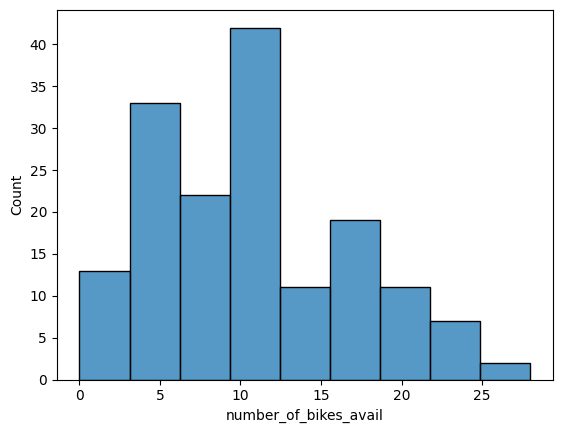

In [7]:
sns.histplot(df_bixi['number_of_bikes_avail'])
# This is our target variable and we see that it is slightly skewed 

In [8]:
# scatter plot function for chosen x variable and the y variable number of bikes available 
def scatterplot_nbofbike(df, x_var):
    data = df[['number_of_bikes_avail',x_var]]
    data.plot.scatter(x=x_var, y='number_of_bikes_avail')

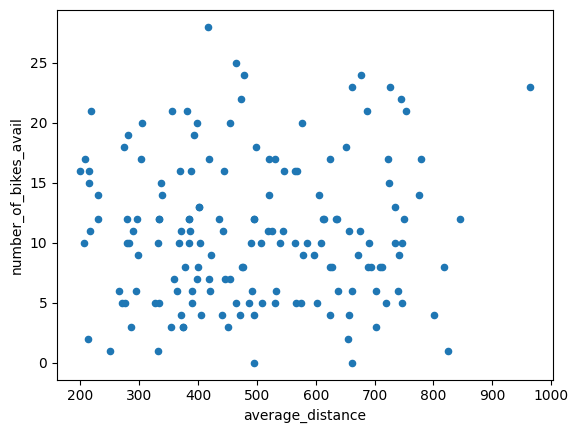

In [9]:
# scatter plot average_distance vs. number_of_bikes_avail in the merged Foursquare dataframe
scatterplot_nbofbike(df_merged_fs, 'average_distance') 

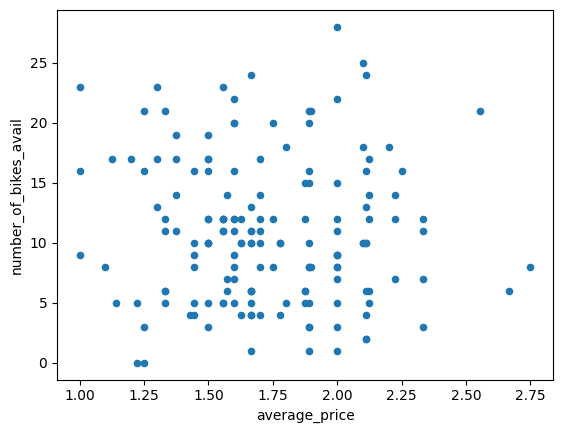

In [10]:
# scatter plot average_price vs. number_of_bikes_avail in the merged Foursquare dataframe
scatterplot_nbofbike(df_merged_fs, 'average_price') 

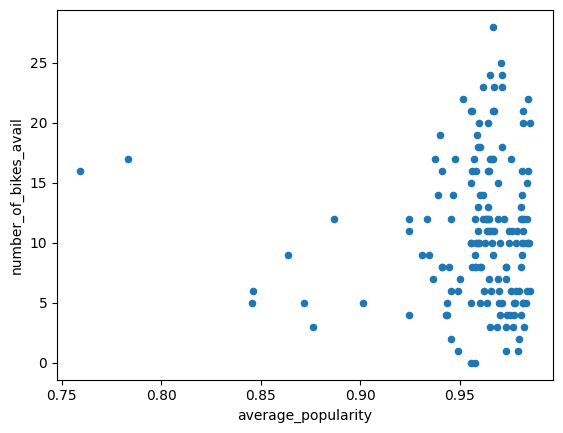

In [11]:
# scatter plot average_popularity vs. number_of_bikes_avail in the merged Foursquare dataframe
scatterplot_nbofbike(df_merged_fs, 'average_popularity') 

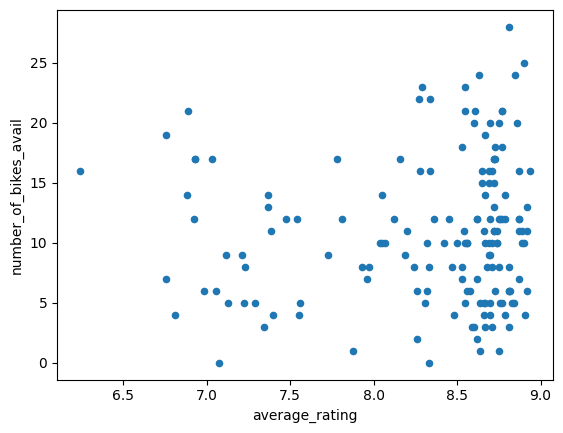

In [12]:
# scatter plot average_rating vs. number_of_bikes_avail in the merged Foursquare dataframe
scatterplot_nbofbike(df_merged_fs, 'average_rating') 

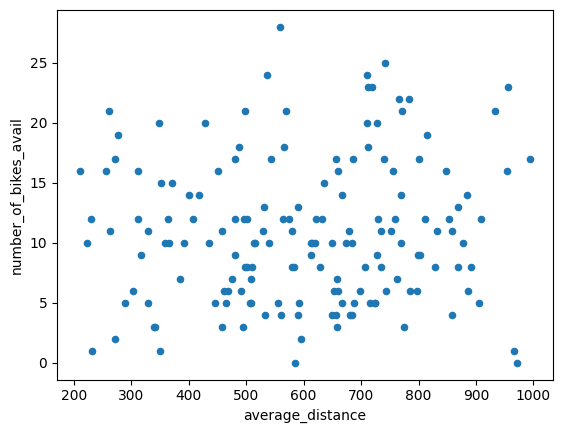

In [13]:
# scatter plot average_distance vs. number_of_bikes_avail in the merged Yelp dataframe
scatterplot_nbofbike(df_merged_yelp, 'average_distance') 

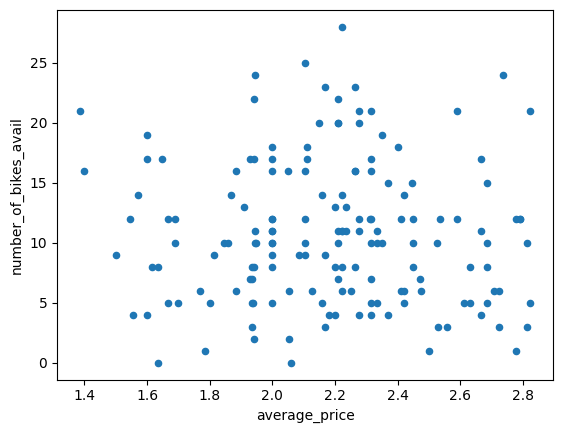

In [14]:
# scatter plot average_price vs. number_of_bikes_avail in the merged Yelp dataframe
scatterplot_nbofbike(df_merged_yelp, 'average_price') 

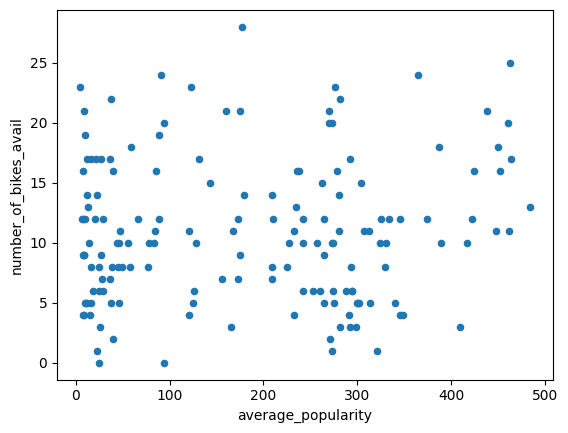

In [15]:
# scatter plot average_popularity vs. number_of_bikes_avail in the merged Yelp dataframe
scatterplot_nbofbike(df_merged_yelp, 'average_popularity') 

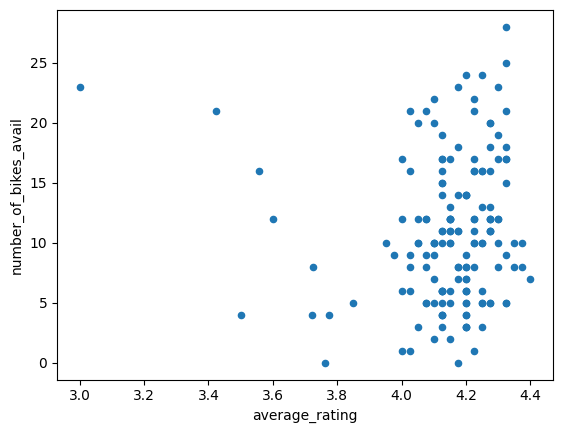

In [16]:
# scatter plot average_rating vs. number_of_bikes_avail in the merged Yelp dataframe
scatterplot_nbofbike(df_merged_yelp, 'average_rating') 

There seems to be no correlation between the chosen x variables and the y variable number of bikes available. This is true regardless of if it's data from Yelp or Foursquare 

In [21]:
# Join bixi with foursquare and yelp dataframe
df_merged_all = pd.merge(df_merged_fs, df_yelp, on=['latitude','longitude'])
df_merged_all

,name,latitude,longitude,number_of_bikes_avail,empty_slots,total_slots,average_distance_x,average_price_x,average_popularity_x,average_rating_x,average_distance_y,average_price_y,average_popularity_y,average_rating_y
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,10,5,15,490.3,1.888889,0.970151,8.710000,540.318381,2.450000,388.95,4.125
1,Marché Maisonneuve,45.553219,-73.539782,5,17,22,390.6,2.000000,0.943919,8.310000,465.190825,1.937500,37.00,4.075
2,Rachel / de Brébeuf,45.526890,-73.572640,20,9,29,454.5,1.600000,0.964516,8.750000,726.882872,2.277778,461.15,4.275
3,Bibliothèque d'Ahuntsic (Lajeunesse / Fleury),45.553400,-73.662255,4,10,15,655.9,2.111111,0.943036,7.400000,681.071769,2.181818,7.90,3.775
4,Cité des Arts du Cirque (Paul Boutet / des Reg...,45.559842,-73.615447,21,13,34,753.3,1.250000,0.956463,6.888889,771.595287,1.384615,8.55,3.425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Métro Atwater (Atwater / Ste-Catherine),45.489525,-73.584458,22,13,35,473.7,1.600000,0.984520,8.340000,766.588555,2.210526,281.45,4.225
156,Complexe Desjardins (St-Urbain / René-Lévesque),45.507885,-73.563151,6,35,41,294.2,1.666667,0.980067,8.810000,461.230112,2.411765,274.30,4.125
157,de Maisonneuve / Mackay,45.496496,-73.578704,2,17,19,212.7,2.111111,0.980142,8.620000,270.852431,2.052632,271.45,4.100
158,du Mont-Royal / de Brébeuf,45.529337,-73.577953,3,8,11,286.6,1.500000,0.965444,8.590000,457.547915,2.166667,409.70,4.200


In [22]:
# Renaming columns
df_merged_all = df_merged_all.rename(columns={
    'average_distance_x': 'average_distance_fs',
    'average_price_x': 'average_price_fs',
    'average_popularity_x': 'average_popularity_fs',
    'average_rating_x': 'average_rating_fs',
    'average_distance_y': 'average_distance_yelp',
    'average_price_y': 'average_price_yelp',
    'average_popularity_y': 'average_popularity_yelp',
    'average_rating_y': 'average_rating_yelp',
})

df_merged_all.head()


,name,latitude,longitude,number_of_bikes_avail,empty_slots,total_slots,average_distance_fs,average_price_fs,average_popularity_fs,average_rating_fs,average_distance_yelp,average_price_yelp,average_popularity_yelp,average_rating_yelp
0,Gare d'autocars de Montréal (Berri / Ontario),45.516926,-73.564257,10,5,15,490.3,1.888889,0.970151,8.710000,540.318381,2.450000,388.95,4.125
1,Marché Maisonneuve,45.553219,-73.539782,5,17,22,390.6,2.000000,0.943919,8.310000,465.190825,1.937500,37.00,4.075
2,Rachel / de Brébeuf,45.526890,-73.572640,20,9,29,454.5,1.600000,0.964516,8.750000,726.882872,2.277778,461.15,4.275
3,Bibliothèque d'Ahuntsic (Lajeunesse / Fleury),45.553400,-73.662255,4,10,15,655.9,2.111111,0.943036,7.400000,681.071769,2.181818,7.90,3.775
4,Cité des Arts du Cirque (Paul Boutet / des Reg...,45.559842,-73.615447,21,13,34,753.3,1.250000,0.956463,6.888889,771.595287,1.384615,8.55,3.425


In [25]:
# Create a dataframe that contains only the variable that we're interested in
df_chosen_var = df_merged_all[['number_of_bikes_avail', 'average_distance_fs', 'average_price_fs', 'average_popularity_fs', 'average_rating_fs', 'average_distance_yelp', 'average_price_yelp', 'average_popularity_yelp', 'average_rating_yelp']]

df_chosen_var.head()

,number_of_bikes_avail,average_distance_fs,average_price_fs,average_popularity_fs,average_rating_fs,average_distance_yelp,average_price_yelp,average_popularity_yelp,average_rating_yelp
0,10,490.3,1.888889,0.970151,8.710000,540.318381,2.450000,388.95,4.125
1,5,390.6,2.000000,0.943919,8.310000,465.190825,1.937500,37.00,4.075
2,20,454.5,1.600000,0.964516,8.750000,726.882872,2.277778,461.15,4.275
3,4,655.9,2.111111,0.943036,7.400000,681.071769,2.181818,7.90,3.775
4,21,753.3,1.250000,0.956463,6.888889,771.595287,1.384615,8.55,3.425


In [26]:
# Create a correlation matrix with the chosen variables
correlation_matrix = df_chosen_var.corr(numeric_only=True)
correlation_matrix

,number_of_bikes_avail,average_distance_fs,average_price_fs,average_popularity_fs,average_rating_fs,average_distance_yelp,average_price_yelp,average_popularity_yelp,average_rating_yelp
number_of_bikes_avail,1.000000,0.021648,-0.039631,0.024055,0.064189,0.064500,-0.049179,0.088496,0.043729
average_distance_fs,0.021648,1.000000,-0.387542,-0.283226,-0.420921,0.814713,-0.378363,-0.497627,-0.120430
average_price_fs,-0.039631,-0.387542,1.000000,0.374306,0.513417,-0.458393,0.451609,0.323505,0.062405
average_popularity_fs,0.024055,-0.283226,0.374306,1.000000,0.712082,-0.360593,0.544736,0.521653,0.272291
average_rating_fs,0.064189,-0.420921,0.513417,0.712082,1.000000,-0.464369,0.697998,0.712738,0.447862
average_distance_yelp,0.064500,0.814713,-0.458393,-0.360593,-0.464369,1.000000,-0.336802,-0.375847,-0.060052
average_price_yelp,-0.049179,-0.378363,0.451609,0.544736,0.697998,-0.336802,1.000000,0.650023,0.286366
average_popularity_yelp,0.088496,-0.497627,0.323505,0.521653,0.712738,-0.375847,0.650023,1.000000,0.284468
average_rating_yelp,0.043729,-0.120430,0.062405,0.272291,0.447862,-0.060052,0.286366,0.284468,1.000000


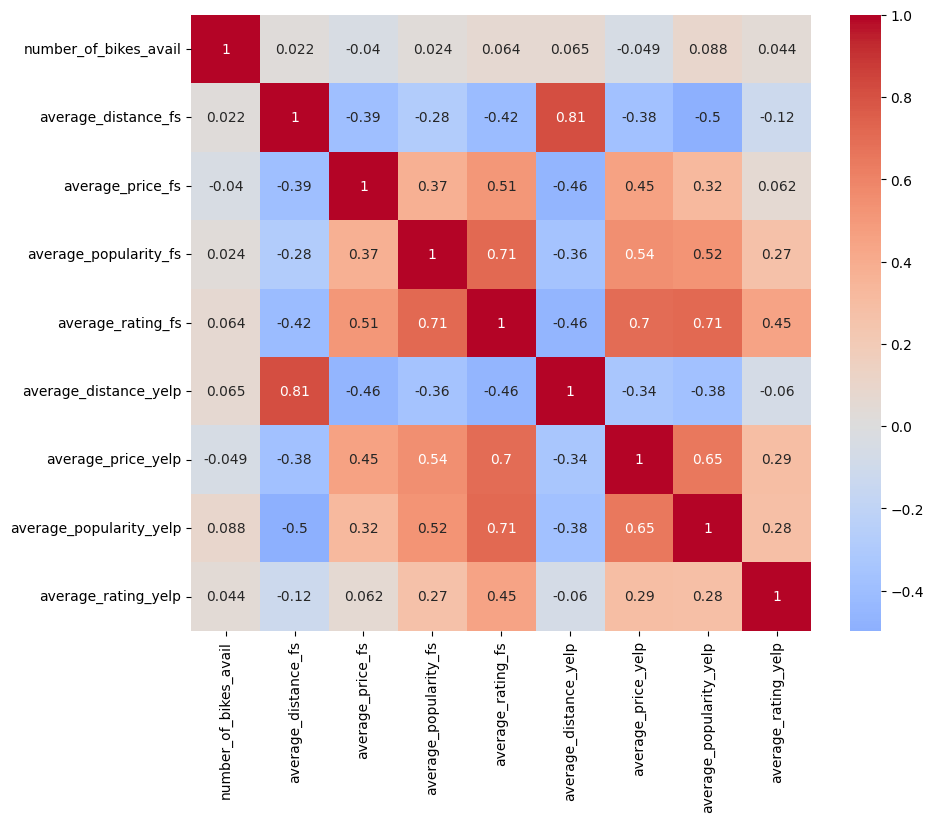

In [27]:
# Visualization for the correlation matrix above 

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.show()

In [29]:
# Saving chosen variables dataframe to a csv file 
df_chosen_var.to_csv('../data/df_chosen_var.csv', index=False)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [2]:
def store_dataframe_sqlite3(df, db_path, table_name):
    # Connect to the SQLite3 database
    conn = sqlite3.connect(db_path)

    # Store the dataframe in the database
    df.to_sql(table_name, conn, if_exists='replace', index=False)

    # Close connection
    conn.close()

In [10]:
# Storing bixi dataframe to SQLite3 database
store_dataframe_sqlite3(df_bixi, '../data/bixi_bike_poi.db', 'bixi')

In [11]:
# Storing Foursquare dataframe to SQLite3 database
store_dataframe_sqlite3(df_fs, '../data/bixi_bike_poi.db', 'foursquare')

In [12]:
# Storing Yelp dataframe to SQLite3 database
store_dataframe_sqlite3(df_yelp, '../data/bixi_bike_poi.db', 'yelp')

Look at the data before and after the join to validate your data.

In [15]:
def sql_query(db_path, query):
    # Connect to the SQLite3 database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Execute the query
    cursor.execute(query)
    
    # Fetch all rows from the query result
    results = cursor.fetchall()

    # Close the connection
    conn.close()

    return results

In [16]:
# Parameters of the query
db_path = '../data/bixi_bike_poi.db'  
query = "SELECT * FROM bixi"

results = sql_query(db_path, query)

for row in results:
    print(row)

("Gare d'autocars de Montréal (Berri / Ontario)", 45.516926210319546, -73.56425732374191, 10, 5, 15)
('Marché Maisonneuve', 45.55321884238814, -73.53978216648102, 5, 17, 22)
('Rachel / de Brébeuf', 45.52689, -73.57264, 20, 9, 29)
("Bibliothèque d'Ahuntsic (Lajeunesse / Fleury)", 45.5534000891078, -73.66225451231003, 4, 10, 15)
('Cité des Arts du Cirque (Paul Boutet / des Regrattiers)', 45.55984236120471, -73.61544728279114, 21, 13, 34)
('Omer-Lavallée / du Midway', 45.5457759528664, -73.56217458844185, 14, 3, 18)
('Papineau / Émile-Journault', 45.55988367688166, -73.63356828689575, 23, 10, 35)
('CHSLD St-Michel (8e avenue / Jarry)', 45.5616903, -73.610512, 4, 11, 15)
('Chabanel / du Parc', 45.53830765459552, -73.6548838019371, 5, 25, 30)
('Métro Henri-Bourassa (Henri-Bourassa / Millen)', 45.55675103297278, -73.66716161370277, 12, 4, 16)
('Calixa-Lavallée / Rachel', 45.52783154456306, -73.5719096660614, 11, 18, 30)
('Marché Jean-Talon (Casgrain / Shamrock)', 45.53519006163501, -73.61548